# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [60]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
set.seed(110010101)



## python libraries

In [3]:
#!conda env export > environment.yml

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [5]:
%%R
sce_vex1_1 = readRDS('sce_vsg_vex1_1.rds')
sce_vex1_2 = readRDS('sce_vsg_vex1_2.rds')
sce_vsg<-cbind(sce_vex1_1, sce_vex1_2)
sce_vsg

class: SingleCellExperiment 
dim: 22 11334 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(11334): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGTTGCATGACTGT-1 TTTGTTGGTATCGAGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [6]:
#%%R
#experiment_label = c(replicate(dim(sce_vex1_1)[2], 'R1' ), replicate(dim(sce_vex1_2)[2], 'R2'))
#length(experiment_label)

In [7]:
#%%R


In [8]:
#%%R
#sce_list <- list((sce_vex1_1),(sce_vex1_2)) 
#sce<- sce_cbind(sce_list, method = "intersect", exprs = c("counts"), colData_names = TRUE)
#sce

In [9]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 2385 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(2385): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGGTTAGGCTTAAA-1 TTTGTTGAGCCGATAG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [10]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [11]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_merge.csv",sep=''),sep = ",")

In [12]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_merge_norm.csv",sep=''),sep = ",")

In [13]:
temp = pd.read_csv("new_count_vsg_vex1_merge.csv")
temp.head()

,AAACCCACAATAGGAT-1,AAACCCACATGGTACT-1,AAACGCTCAACTGATC-1,AAAGAACAGGTGCATG-1,AAAGGATCAATCTCTT-1,AAAGGATCACCCAAGC-1,AAAGGATGTCGGTACC-1,AAAGGGCAGGTAAGAG-1,AAAGGGCGTGTATTCG-1,AAAGGGCTCGATTGAC-1,...,TTGTGGAAGAATCTAG-1,TTGTGGACACAGGATG-1,TTTACCAAGAGGCGGA-1,TTTACCACATCGCTGG-1,TTTAGTCGTGGCCACT-1,TTTCATGAGCATGATA-1,TTTGATCGTTCCGCAG-1,TTTGGAGCAAGCTGCC-1,TTTGGTTAGGCTTAAA-1,TTTGTTGAGCCGATAG-1
vsg-2-Tb427.BES40.22,52,86,81,90,74,91,66,86,39,50,...,38,80,48,74,46,55,60,93,86,67
vsg-9-Tb427.BES129.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,0,0,0,0,0,0,0,1,2,0,...,11,0,0,0,0,0,0,0,0,0
vsg-21-Tb427.BES28.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
list(temp.index.values)

['vsg-2-Tb427.BES40.22',
 'vsg-9-Tb427.BES129.14',
 'vsg-6-Tb427.BES15.12',
 'vsg-21-Tb427.BES28.15',
 'vsg-18-Tb427.BES98.12',
 'vsg-3-Tb427.BES65.13',
 'vsg-14-Tb427.BES64.2',
 'vsg-15-Tb427.BES134.6',
 'vsg-16-Tb427.BES122.11',
 'vsg-8-Tb427.BES29.9',
 'vsg-17-Tb427.BES56.13',
 'vsg-19-Tb427.BES10.10',
 'vsg-11-Tb427.BES126.15',
 'vsg-13-Tb427.BES51.12',
 'vsg-mes-Tb427VSG-397',
 'vsg-mes-Tb427VSG-531',
 'vsg-mes-Tb427VSG-639',
 'vsg-mes-Tb427VSG-653',
 'vsg-mes-Tb427VSG-1954',
 'vsg-mes-Tb427VSG-636',
 'vsg-mes-Tb427VSG-559',
 'vsg-mes-Tb427VSG-3591']

In [15]:
print(1)

1


In [16]:
#%%R
#adjustcolor( "red", alpha.f = 0.2)

In [17]:
%%R
experiment_label = c(replicate(dim(sce_vex1_1)[2], 'R1' ), replicate(dim(sce_vex1_2)[2], 'R2'))
length(experiment_label)

[1] 11334


In [18]:
%%R
experiment_label = experiment_label[keep_feature]
length(experiment_label)

[1] 2385


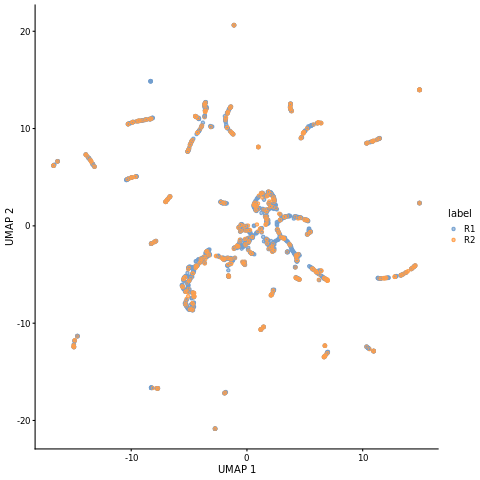

In [19]:
%%R
sce_vsg <- runUMAP(sce_vsg)
colLabels(sce_vsg) <- experiment_label
plotReducedDim(sce_vsg, dimred="UMAP", colour_by="label"
              ) + geom_point(
    shape=21, alpha = 1, size = 1, aes(color = factor(experiment_label)))

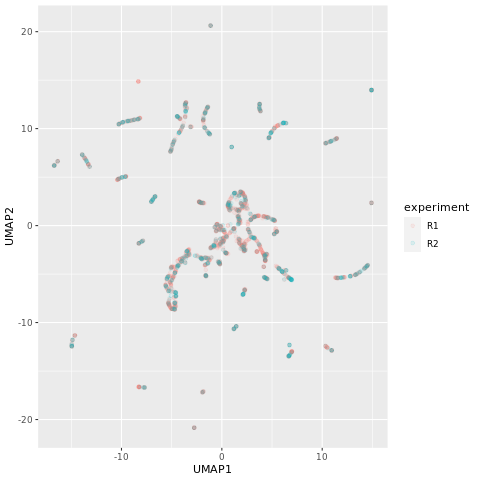

In [20]:
%%R
umap <- reducedDim(sce_vsg, "UMAP")
umap_df <- as.data.frame(umap)
colnames(umap_df) <- c("UMAP1", "UMAP2")
umap_df$experiment=experiment_label
head(umap_df)
ggplot(umap_df, aes(x = UMAP1, y = UMAP2, 
                     color=experiment))+ geom_point(
   
alpha = 1/10, 
)

In [21]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 67  72 504  62  64  59  55 435 207  53  58  49  44  71  46  52  46  38  38  38 
 21  22  23  24  25  26 
 79  49  31  96  40  32 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


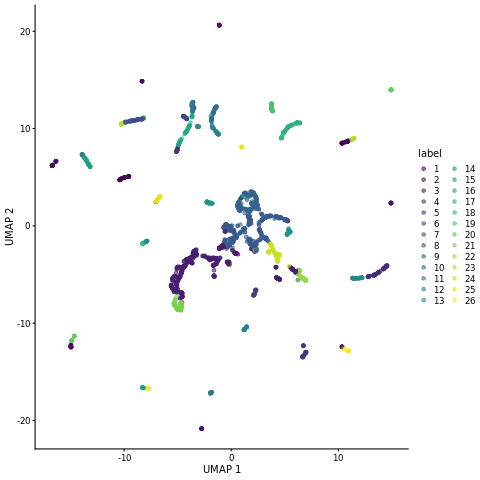

In [22]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




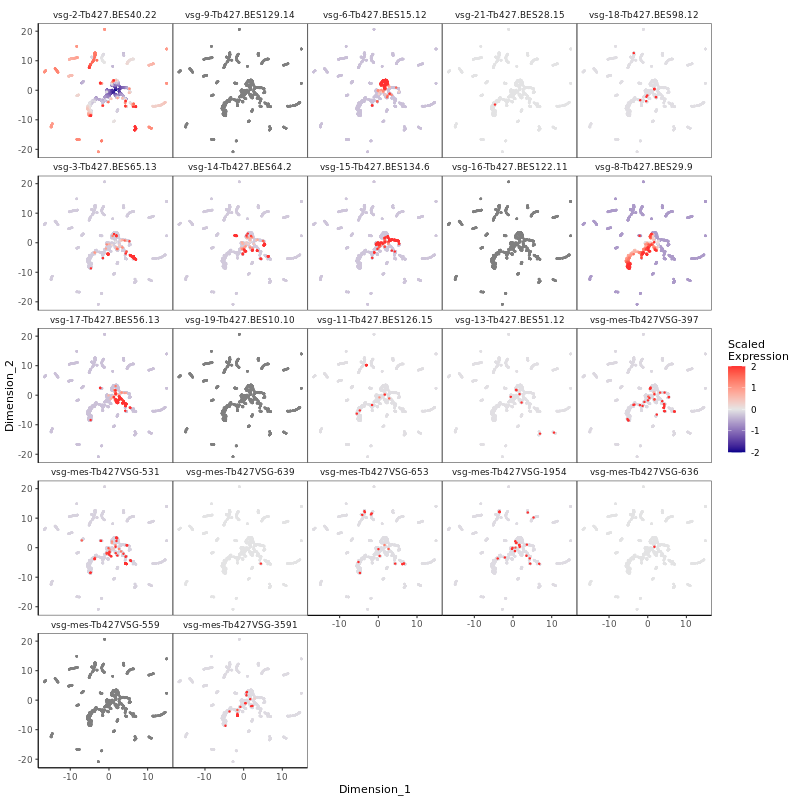

In [23]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

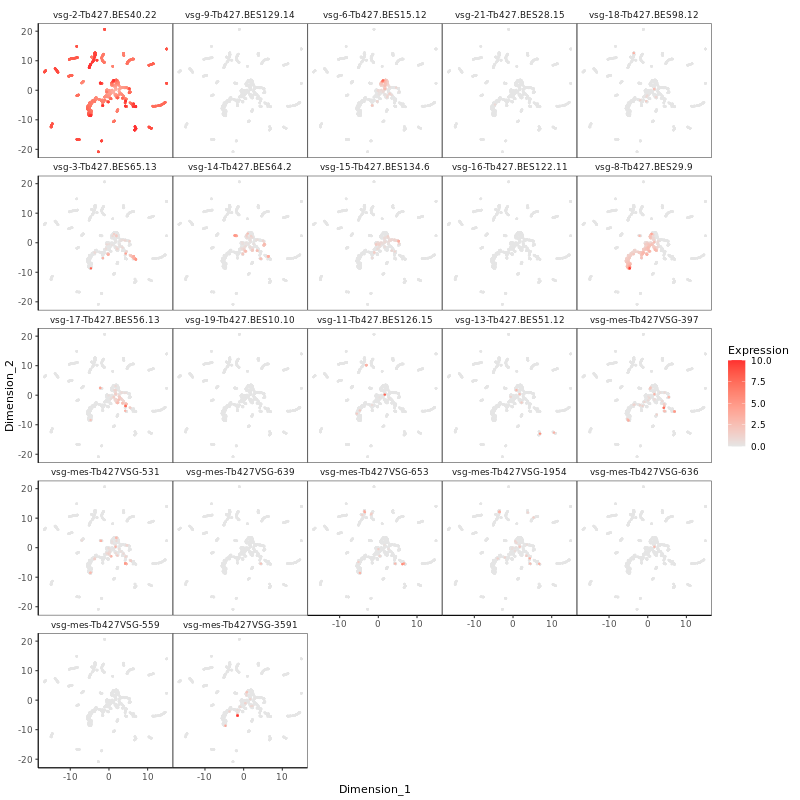

In [24]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [25]:
%%R
max(logcounts(sce_vsg))

[1] 18.21705


In [26]:
%%R
head(colLabels(sce_vsg))

[1] 3  12 11 11 11 3 
26 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 26


In [27]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [28]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [29]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 3  12 11 11 11 3 
26 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 26


In [30]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex1_merge_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex1_merge_norm.csv')
umap.head()



,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,6.044460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.169962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.385728,-3.099607,3
AAACCCACATGGTACT-1,6.919456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.641953,10.006498,12
AAACGCTCAACTGATC-1,9.455280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.617739,11.851342,11
AAAGAACAGGTGCATG-1,9.431372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.664898,12.186691,11
AAAGGATCAATCTCTT-1,9.325078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.558065,12.710470,11


In [31]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [32]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex1_merge.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex1_merge.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-3.385728,-3.099607,3
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.641953,10.006498,12
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.617739,11.851342,11
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.664898,12.186691,11
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.558065,12.710470,11


In [33]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

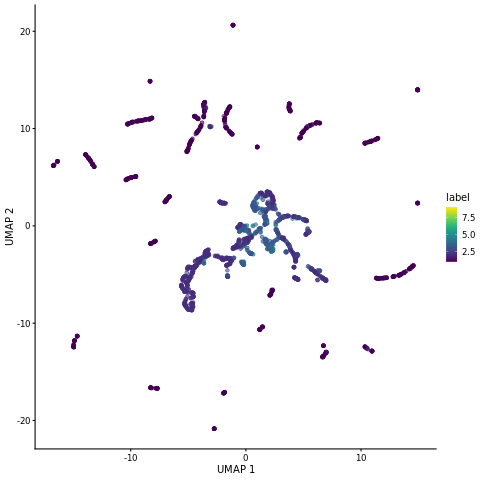

In [34]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [35]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-3.385728,-3.099607,3
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.641953,10.006498,12
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.617739,11.851342,11
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.664898,12.186691,11
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.558065,12.710470,11


In [36]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-16-Tb427.BES122.11         0
vsg-9-Tb427.BES129.14          0
vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-559           0
vsg-21-Tb427.BES28.15          1
vsg-mes-Tb427VSG-639           2
vsg-mes-Tb427VSG-653          20
vsg-mes-Tb427VSG-636          26
vsg-mes-Tb427VSG-1954         38
vsg-11-Tb427.BES126.15        67
vsg-13-Tb427.BES51.12         67
vsg-mes-Tb427VSG-3591         96
vsg-18-Tb427.BES98.12         97
vsg-mes-Tb427VSG-397         102
vsg-mes-Tb427VSG-531         130
vsg-3-Tb427.BES65.13         164
vsg-14-Tb427.BES64.2         225
vsg-15-Tb427.BES134.6        287
vsg-17-Tb427.BES56.13        585
vsg-6-Tb427.BES15.12         910
vsg-8-Tb427.BES29.9         2317
vsg-2-Tb427.BES40.22      151340
dtype: object

#umap.sum().drop(['comp1','comp2','clusters']).sort_values()
vsg-mes-Tb427VSG-1954        193
vsg-21-Tb427.BES28.15        313
vsg-mes-Tb427VSG-531         529
vsg-mes-Tb427VSG-397         547
vsg-14-Tb427.BES64.2        1133
vsg-mes-Tb427VSG-653        1204
vsg-9-Tb427.BES129.14       1220
vsg-3-Tb427.BES65.13        1327
vsg-11-Tb427.BES126.15      1427
vsg-13-Tb427.BES51.12       1598
vsg-18-Tb427.BES98.12       5833
vsg-8-Tb427.BES29.9        13227
vsg-17-Tb427.BES56.13      21209
vsg-15-Tb427.BES134.6      22677
vsg-6-Tb427.BES15.12       44708
vsg-2-Tb427.BES40.22      463461

In [37]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-3.385728,-3.099607,3,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.641953,10.006498,12,"(vsg-2-Tb427.BES40.22,)",1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-3.617739,11.851342,11,"(vsg-2-Tb427.BES40.22,)",1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-3.664898,12.186691,11,"(vsg-2-Tb427.BES40.22,)",1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-3.558065,12.710470,11,"(vsg-2-Tb427.BES40.22,)",1


In [39]:
umap.vsg_class.value_counts().head(10)

(vsg-2-Tb427.BES40.22,)                                               913
(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)                           469
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                          102
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22)                          95
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)     69
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)      67
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22)                          67
(vsg-2-Tb427.BES40.22, vsg-3-Tb427.BES65.13)                           61
(vsg-14-Tb427.BES64.2, vsg-2-Tb427.BES40.22)                           60
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)     57
Name: vsg_class, dtype: int64

In [40]:
umap.size_class.value_counts()

2    925
1    913
3    399
4    121
5     20
6      4
7      2
9      1
Name: size_class, dtype: int64

In [41]:
umap.shape

(2385, 27)

In [42]:
#umap.columns

In [43]:
%R -o experiment_label

In [44]:
umap['replica']=experiment_label
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,-3.385728,-3.099607,3,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2,R1
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.641953,10.006498,12,"(vsg-2-Tb427.BES40.22,)",1,R1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.617739,11.851342,11,"(vsg-2-Tb427.BES40.22,)",1,R1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.664898,12.186691,11,"(vsg-2-Tb427.BES40.22,)",1,R1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.558065,12.710470,11,"(vsg-2-Tb427.BES40.22,)",1,R1


In [45]:
umap.to_csv("new_count_vsg_vex1_merge.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,-3.385728,-3.099607,3,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2,R1
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.641953,10.006498,12,"(vsg-2-Tb427.BES40.22,)",1,R1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.617739,11.851342,11,"(vsg-2-Tb427.BES40.22,)",1,R1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.664898,12.186691,11,"(vsg-2-Tb427.BES40.22,)",1,R1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.558065,12.710470,11,"(vsg-2-Tb427.BES40.22,)",1,R1


In [46]:
df = pd.read_csv('new_count_vsg_vex1_merge.csv',index_col =[0])

In [47]:
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,-3.385728,-3.099607,3,"('vsg-2-Tb427.BES40.22', 'vsg-8-Tb427.BES29.9')",2,R1
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.641953,10.006498,12,"('vsg-2-Tb427.BES40.22',)",1,R1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.617739,11.851342,11,"('vsg-2-Tb427.BES40.22',)",1,R1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.664898,12.186691,11,"('vsg-2-Tb427.BES40.22',)",1,R1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-3.558065,12.710470,11,"('vsg-2-Tb427.BES40.22',)",1,R1


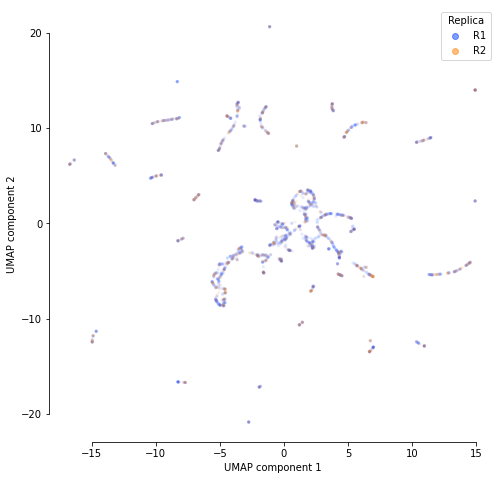

In [48]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='replica', ax=ax,
                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
leg.set_title('Replica')

ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

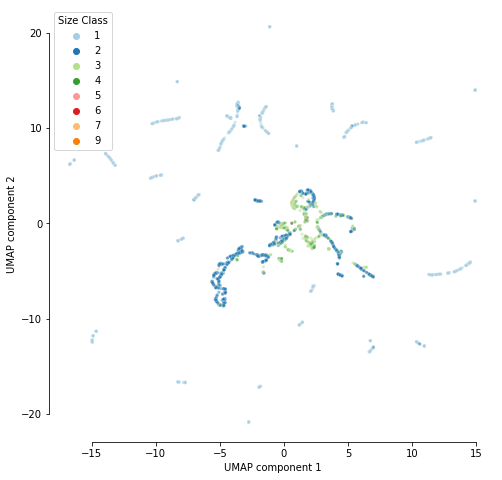

In [49]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)

In [50]:
def clean_vsgs(X):
    res = []
    for n in eval(X):

        if 'mes' in n:
            temp_id = 'mes-'+n.split('-')[-1]
        else:
            temp_id = 'vsg-'+n.split('-')[1]
        res.append(temp_id)
    return ';'.join(res)

In [51]:
df['vsg_class2'] = df['vsg_class'].apply(clean_vsgs)

In [52]:
vsg_selections = df['vsg_class2'].value_counts().head(9).index.values


In [53]:
df['vsg_class3'] = [n if n in vsg_selections else 'other' for n in df['vsg_class2']]
df.head()
                    

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica,vsg_class2,vsg_class3
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,-3.385728,-3.099607,3,"('vsg-2-Tb427.BES40.22', 'vsg-8-Tb427.BES29.9')",2,R1,vsg-2;vsg-8,vsg-2;vsg-8
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,-1.641953,10.006498,12,"('vsg-2-Tb427.BES40.22',)",1,R1,vsg-2,vsg-2
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,-3.617739,11.851342,11,"('vsg-2-Tb427.BES40.22',)",1,R1,vsg-2,vsg-2
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,-3.664898,12.186691,11,"('vsg-2-Tb427.BES40.22',)",1,R1,vsg-2,vsg-2
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,-3.558065,12.710470,11,"('vsg-2-Tb427.BES40.22',)",1,R1,vsg-2,vsg-2


In [54]:
#import seaborn as sns
#fig,ax=plt.subplots(figsize=(8,8))
#sns.scatterplot(data=df, x='comp1',y='comp2', hue='vsg_class3', ax=ax,
#                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
#ax.set_xlabel('UMAP component 1')   
#ax.set_ylabel('UMAP component 2')

#sns.despine(fig,trim=True)

In [55]:
dict_size = df['vsg_class3'].value_counts().to_dict()
df['vsg_class4'] = [n+' (n='+str(dict_size[n])+')' for n in df['vsg_class3']]
df['vsg_count_5'] = [dict_size[n] for n in df['vsg_class3']]


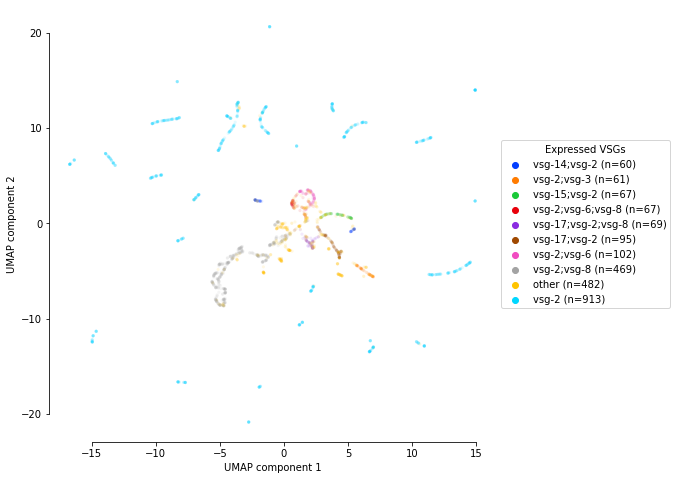

In [56]:

import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df.sort_values('vsg_count_5'), x='comp1',y='comp2', hue='vsg_class4', ax=ax,
                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

In [57]:
palette = sns.color_palette('bright')
use_palette = list(palette)
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [58]:
light_blue = use_palette[-1]#= (0.5, 0.5, 0.5)
grey = use_palette[-3]
use_palette[-3]=light_blue
use_palette[-1]=grey
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.0, 0.8431372549019608, 1.0),
 (1.0, 0.7686274509803922, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098)]

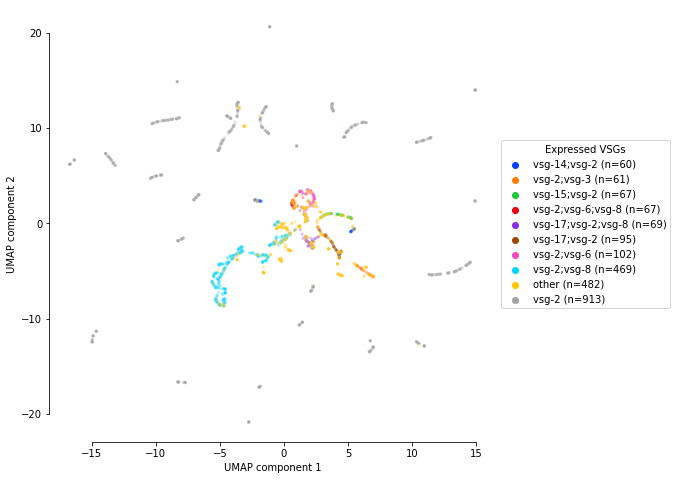

In [59]:

import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df.sort_values('vsg_count_5'), x='comp1',y='comp2', hue='vsg_class4', ax=ax,
                alpha=0.3, s=10, palette =use_palette)

#sns.scatterplot(data=df[df['vsg_class3']=='other'].sort_values('vsg_count_5'), x='comp1',y='comp2',  ax=ax,
#                alpha=0.1, s=10, c='b')


#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

In [125]:
#df[df['vsg_count_5']<316]

In [124]:
#df['vsg_count_5'].value_counts()